# <div class="alert alert-block alert-danger"><center>F Galland - CPGE  - MP - Capacité numérique: à l’aide d’un langage de programmation, simuler un filtrage numérique et visualiser son action sur un signal périodique. </center></div>

Le but est ici de:

 * construire un signal périodique à partir d'une supersposition de signaux sinusoïdaux (cf théorème de Fourier);
 * tracer son spectre;
 * réaliser un filtrage numérique en appliquant la fonction de transfert à chacune des harmoniques;
 * réaliser un filtrage numérique à l'aide d'une relation de récurrence.

On s'appuiera sur l'exercice 2 du TD-Elec-1 (attention, fe fait ici référence à la fréquence du signal créneau, et sera noté f par la suite, de manière à ne pas confondre avec la fréquence d'échantillonnage qui sera notée fe).

In [1]:
#---------------------------------------------------------------------------------------------------------
## Importation des bibliothèques utiles
#---------------------------------------------------------------------------------------------------------

import numpy as np ## on importe la bibliothèque de fonctions "numpy" que l'on renomme np : https://numpy.org/doc/stable/
import matplotlib.pyplot as plt ## on importe la bibliothèque de fonctions "matplotlib" que l'on renomme plt : https://matplotlib.org/stable/index.html
from scipy.fftpack import fft

plt.close('all')## efface toutes les figures pour ne pas saturer la mémoire


## I. Représentation temporelle d'un signal

1. Rédiger ci-dessous un code en langage python permettant de tracer le signal $ s_1(t) = A\times cos(2\pi f t)$ avec $A=1$, $f=1000$ Hz entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$ points.


In [2]:
A = 1
f = 1000
tmin = 0
tmax = 0.005
N = 10000
t = np.linspace(tmin, tmax, N)
s1 = A*np.cos(2*np.pi*f*t)
plt.plot(t,s1)
plt.show()

2. Rédiger ci-dessous un code en langage python permettant de tracer le signal $s_2(t) = A \times cos(2\pi f t) + 0.5 \times A \times sin(2\pi \times 5f t)$, avec encore $A=1$, $f=1000$ Hz entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$ points.

In [3]:
s2 = A*np.cos(2*np.pi*f*t)+0.5*A*np.sin(2*np.pi*5*f*t)
plt.close()
plt.plot(t,s2)
plt.show()

3. Rédiger ci-dessous un code en langage python permettant de tracer un signal rectangulaire d'amplitude $A=1$ et de fréquence $f=1000$ Hz, encore entre $t_{min}=0$ et $t_{max}=5$ ms avec $N=1000$ points. On se limitera à 30 harmoniques.

On donne la décomposition en série de Fourier d'un signal rectangulaire impair : $$s_3(t)=\cfrac{2A}{\pi}\sum_{k=0}^{\infty}\cfrac{sin(2\pi(2k+1) f t)}{2k+1}$$.

In [4]:
s3 = np.zeros(N)
for k in range(0,31):
    s3 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t)/(2*k+1)

plt.close()
plt.plot(t,s3)
plt.show()

## II. Représentation spectrale d'un signal

4. Calculer et afficher la période d'échantillonnage $T_e$, la fréquence d'échantillonnage $f_e$ et la résolution spectrale $\Delta f_{min}$.

In [5]:
Te = tmax/N         # période d'échantillonnage
fe = 1/Te           # fréquence d'échantillonnage
Deltaf = fe/N       # résolution spectrale
print('Te=',Te,'fe=',fe,'Delta f_min=',Deltaf)

Te= 5e-07 fe= 2000000.0 Delta f_min= 200.0


5. Rédiger ci-dessous un code en langage python permettant de tracer le spectre des différents signaux précédents en utilisant la fonction `fft` et en limitant l'axe des fréquences à $f_{max}=10000$ Hz.

In [6]:
freq = np.arange(0.,N)*fe/N   # axe des fréquences
sp1 = fft(s1)/np.size(s1)     # une division par la taille de la liste du signal est nécessaire pour normaliser la fonction fft
sp2 = fft(s2)/np.size(s2)
sp3 = fft(s3)/np.size(s3)

plt.close()
plt.xlim(0,10000)             # on limite l'axe des fréquences à 10 kHz car sinon l'axe est gradué jusqu'à fe=200 kHz
plt.plot(freq,abs(sp1),'-b')  # il faut prendre le module pour le tracé du spectre avec la fonction fft qui renvoie des  valeurs complexes
plt.plot(freq,abs(sp2), '-r')
plt.plot(freq,abs(sp3), '-y')
plt.show()

## III. Filtrage numérique en appliquant la fonction de transfert à chacune des harmoniques

6. Reproduire l'effet du $\underline{\text{filtre} 1}$ de l'exercice 2 du TD-Elec-1 sur le signal créneau, de fonction de transfert 
$$\underline{H}=\cfrac{1}{1+j\cfrac{f}{f_c}}\qquad \text{avec}\qquad fc=0,1 \times f$$
Le gain et la phase sont donnés par 
$$G(f)=\cfrac{1}{\sqrt{1+\left(\cfrac{f}{f_c}\right)^2}} \qquad \text{et} \qquad \varphi(f)=-\text {arctan}\left(\cfrac{f}{f_c}\right)$$

In [7]:
# Filtre 1 : passe bas d'ordre 1 avec $fc=0,1*f$
s3f1 = np.zeros(N)
for k in range(0,31):
    s3f1 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t-np.arctan((2*k+1)/0.1))/(2*k+1)/np.sqrt(1+((2*k+1)/0.1)**2)

plt.close()
plt.plot(t,s3f1)
plt.show()

7. Reproduire les sorties des filtres 2, 3 et 4 en utilisant la même méthode.

$\underline{\text{Filtre} 2}$ : passe haut d'ordre 1 avec $fc=0,4 \times f$
$$\underline{H}=\cfrac{j\cfrac{f}{f_c}}{1+j\cfrac{f}{f_c}}\qquad \text{avec}\qquad fc=0,4 \times f$$
Le gain et la phase sont donnés par 
$$G(f)=\cfrac{\cfrac{f}{f_c}}{\sqrt{1+\left(\cfrac{f}{f_c}\right)^2}} \qquad \text{et} \qquad \varphi(f)=\cfrac{\pi}{2}-\text{arctan}\left(\cfrac{f}{f_c}\right)$$

In [8]:
# Filtre 2 : passe haut d'ordre 1 avec fc=0,4*f
s3f2 = np.zeros(N)
for k in range(0,31):
    s3f2 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t+np.pi/2-np.arctan((2*k+1)/0.4))/(2*k+1)*((2*k+1)/0.4)/np.sqrt(1+((2*k+1)/0.4)**2)

plt.close()
plt.plot(t,s3f2)
plt.show()

$\underline{\text{Filtre} 3}$ : passe haut d'ordre 1 avec $f_c=30 \times f$

$$\underline{H}=\cfrac{j\cfrac{f}{f_c}}{1+j\cfrac{f}{f_c}}\qquad \text{avec}\qquad fc=30 \times f$$
Le gain et la phase sont donnés par 
$$G(f)=\cfrac{\cfrac{f}{f_c}}{\sqrt{1+\left(\cfrac{f}{f_c}\right)^2}} \qquad \text{et} \qquad \varphi(f)=\cfrac{\pi}{2}-\text{arctan}\left(\cfrac{f}{f_c}\right)$$

In [9]:
# Filtre 3 : passe haut d'ordre 1 avec fc=30*fe
s3f3 =  np.zeros(N)
for k in range(0,31):
    s3f3 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t+np.pi/2-np.arctan((2*k+1)/30))/(2*k+1)*((2*k+1)/30)/np.sqrt(1+((2*k+1)/30)**2)

plt.close()
plt.plot(t,s3f3)
plt.show()

$\underline{\text{Filtre} 4}$ : passe bas d'ordre 2 avec $f_0=f$ et Q=1,4

$$\underline{H}=\cfrac{1}{1+j\cfrac{f}{Qf_c}-\left(\cfrac{f}{f_c}\right)^2}=\cfrac{-j}{\cfrac{f}{Qf_c}-j\left(1-\left(\cfrac{f}{f_c}\right)^2\right)}\qquad \text{avec}\qquad f_0=f\qquad \text{et} \qquad Q=1,4$$
On a multiplié la fonction de transfert par $-j$ pour simplifier le calcul de la phase (la partie réelle du complexe au dénominateur est toujours positive avec la nouvelle expression). Le gain et la phase sont donnés par 
$$G(f)=\cfrac{1}{\sqrt{\left(1-\left(\cfrac{f}{f_c}\right)^2\right)^2+\left(\cfrac{1}{Q}\cfrac{f}{f_c}\right)^2}} \qquad \text{et} \qquad \varphi(f)=-\cfrac{\pi}{2}+\text{arctan}\left(\cfrac{1-\left(\cfrac{f}{f_c}\right)^2}{\cfrac{1}{Q}\cfrac{f}{f_c}}\right)$$

In [10]:
# Filtre 4 : passe bas d'ordre 2 avec f0=fe et Q=1.4
# Méthode 1 (en modifiant la fonction de transfert)
s3f4=np.zeros(N)
Q=1.4
for k in range(0,31):
    phi=-np.pi/2+np.arctan((1-(2*k+1)**2)/((2*k+1)/Q))
    s3f4 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t+phi)/np.sqrt((1-(2*k+1)**2)**2+((2*k+1)/Q)**2)

# Méthode 2
s3f42=np.zeros(N)
for k in range(0,31):
    if k==0:  # on est obligé de distinguer ce cas car sinon la phase diverge.
        phi=-np.pi/2
    else:
        phi1=-np.arctan(((2*k+1)/Q)/(1-(2*k+1)**2))
        if (1-(2*k+1)**2)>=0: # Ce premier cas est inutile ici puisque ce terme est toujours négatif, mais cela permet d'illustrer la méthode avec n'importe quelle fréquence d'entrée
            phi=phi1
        else:
            phi=phi1+np.pi
    s3f42 += 4*A/np.pi*np.sin(2*(2*k+1)*np.pi*f*t+phi)/np.sqrt((1-(2*k+1)**2)**2+((2*k+1)/Q)**2)

plt.close()
plt.plot(t,s3f4) 
plt.plot(t,s3f42) # On voit bien que les deux courbes s'identifient
plt.xlim(0,0.0025)
plt.show()

## III. Filtrage numérique en appliquant une relation de récurrence

8. Reproduire à nouveau l'effet du $\underline{\text{filtre} 1}$ de l'exercice 2 du TD-Elec-1 sur le signal créneau, sachant que la fonction de transfert analogique d'un filtre passe-bas du premier ordre est :
$$
\underline{H}(j\omega) = \frac{1}{1 + j\dfrac{\omega}{\omega_c}} = \frac{\underline{s}(t)}{\underline{e}(t)}
$$
où $\omega_c$ est la pulsation de coupure. Lorsqu'on repasse dans le domaine temporel, cela correspond à l'équation différentielle :
$$
\boxed{\underline{e}(t) = \underline{s}(t) + \frac{1}{\omega_c}\, j\omega\, \underline{s}(t) \hspace{0.2cm} \Longrightarrow \hspace{0.2cm} \frac{1}{\omega_c}\, \frac{ds}{dt} + s = e(t)}
$$

Pour des données numériques échantillonnées avec une période $T_e$, l'idée est de remplacer la dérivée temporelle $\dot{s}$ par le taux d'accroissement :
$$
\frac{ds}{dt}(t) \hspace{0.2cm} \longleftrightarrow \hspace{0.2cm} \frac{s_n - s_{n-1}}{T_e}
$$
ce qui permet de transformer l'équation différentielle en :
$$
\boxed{\frac{1}{\omega_c} \, \frac{s_n - s_{n-1}}{T_e} + s_n = e_n \hspace{0.2cm} \Longleftrightarrow \hspace{0.2cm} s_n = \frac{s_{n-1}}{1 + \omega_cT_e} + \frac{\omega_cT_e}{1 + \omega_cT_e}\, e_n}
$$

Les $\{e_n\}$, $T_e$ étant connus, on choisit la pulsation de coupure $\omega_c$ souhaitée : les différents échantillons $\{s_n\}$ se calculent ensuite à l'aide de la récurrence ci-dessus avec une condition initiale pour $s_0$. On a donc remplacé une équation différentielle par une relation de récurrence.

In [11]:
# Filtre 1 : passe bas d'ordre 1 avec fc=0.1*fe
s3r1 = np.zeros(N)
omegacTe = 2*np.pi*0.1*f*Te #Attention, fe dans l'énoncé est la fréquence du créneau et non la fréquence d'échantillonnage
for k in range(1,N):
    s3r1[k] = omegacTe/(1+omegacTe)*s3[k] + s3r1[k-1]/(1+omegacTe)

plt.close()
plt.plot(t,s3r1)
plt.plot(t,s3f1) #On trace simultanément les deux courbes issues du filtrage. On voit qu'elle correspondent bien à un décalage dû aux conditions initiales choisies dans la partie récurrence.
plt.show()

9. Reproduire les courbes pour les filtre 2 et 3 en utilisant la même méthode de la récurrence.

La fonction de transfert analogique d'un filtre passe-haut du premier ordre est :
$$
\underline{H}(j\omega) = \frac{j\dfrac{\omega}{\omega_c}}{1 + j\dfrac{\omega}{\omega_c}} = \frac{\underline{s}(t)}{\underline{e}(t)}
$$
où $\omega_c$ est la pulsation de coupure. Lorsqu'on repasse dans le domaine temporel, cela correspond à l'équation différentielle :
$$
\boxed{\frac{1}{\omega_c}\, j\omega\,\underline{e}(t) = \underline{s}(t) + \frac{1}{\omega_c}\, j\omega\, \underline{s}(t) \hspace{0.2cm} \Longrightarrow \hspace{0.2cm} \frac{1}{\omega_c}\, \frac{ds}{dt} + s = \frac{1}{\omega_c}\, \frac{de}{dt}}
$$

qu'on peut transformer en :
$$
\boxed{\frac{1}{\omega_c} \, \frac{s_n - s_{n-1}}{T_e} + s_n = \frac{1}{\omega_c} \, \frac{e_n - e_{n-1}}{T_e} \hspace{0.2cm} \Longleftrightarrow \hspace{0.2cm} s_n = \frac{s_{n-1}}{1 + \omega_cT_e} + \frac{e_n-e_{n-1}}{1 + \omega_cT_e}}
$$

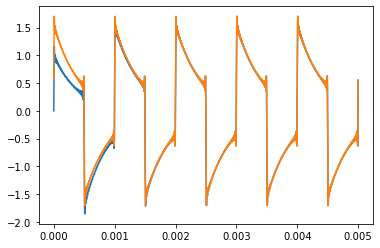

In [16]:
# Filtre 2 : passe haut d'ordre 1 avec fc=0.4*f
s3r2=np.zeros(N)
omegacTe=2*np.pi*0.4*f*Te #Attention, fe dans l'énoncé est la fréquence du créneau et non la fréquence d'échantillonnage
for k in range(1,N):
    s3r2[k] = (s3[k]-s3[k-1])/(1+omegacTe) + s3r2[k-1]/(1+omegacTe)

plt.close()
plt.plot(t,s3r2)
plt.plot(t,s3f2) #On trace simultanément les deux courbes issues du filtrage. On voit qu'elle correspondent bien à un décalage dû aux conditions initiales choisies dans la partie récurrence.
plt.show()

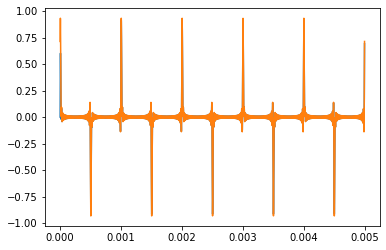

In [17]:
# Filtre 3 : passe haut d'ordre 1 avec fc=30*fe
s3r3=np.zeros(N)
omegacTe=2*np.pi*30*f*Te #Attention, fe dans l'énoncé est la fréquence du créneau et non la fréquence d'échantillonnage
for k in range(1,N):
    s3r3[k] = (s3[k]-s3[k-1])/(1+omegacTe) + s3r3[k-1]/(1+omegacTe)

plt.close()
plt.plot(t,s3r3)
plt.plot(t,s3f3) #On trace simultanément les deux courbes issues du filtrage. On voit qu'elle correspondent bien à un décalage dû aux conditions initiales choisies dans la partie récurrence.
plt.show()